In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import tensorflow as tf

In [18]:
from tensorflow import keras

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('boston.csv')

In [23]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [24]:
X = data.drop('Price', axis = 1)

In [25]:
y = data['Price']

In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [31]:
model = keras.Sequential([
    keras.Input(shape = (X_train.shape[1],)),
    keras.layers.Dense(1)
])

In [32]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [33]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, verbose = 0)

In [34]:
loss, mae = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 458.3156 - mae: 20.5068


In [35]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [38]:
y_pred[0:10]

array([[ 3.5555754],
       [ 7.987143 ],
       [-2.6044407],
       [ 4.332181 ],
       [-3.0846944],
       [ 2.334844 ],
       [ 1.3501014],
       [-1.7077712],
       [-1.1927763],
       [ 0.4875009]], dtype=float32)

In [40]:
y_train[0:10]

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
325    24.6
335    21.1
56     24.7
437     8.7
409    27.5
Name: Price, dtype: float64

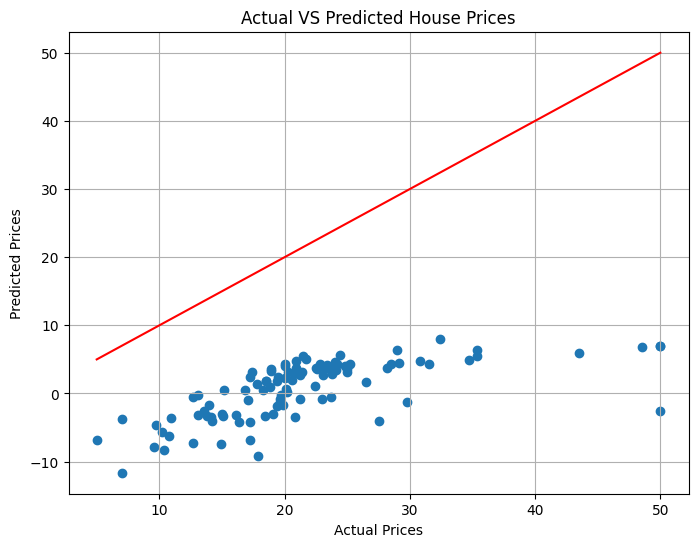

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual VS Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal line
plt.grid(True)
plt.show()

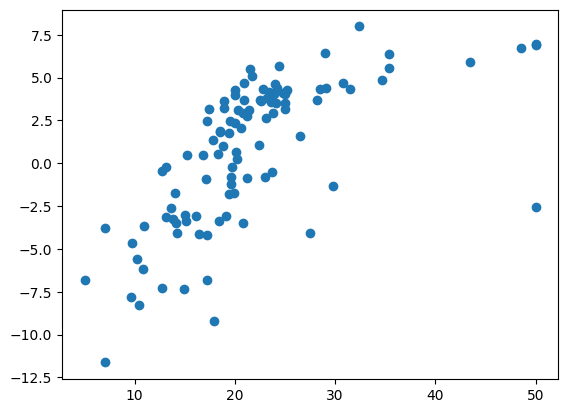